In [1]:
import sys
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

project_root = os.path.abspath('..')
sys.path.insert(0, project_root)

from utils.phase_3 import *

K.set_image_data_format('channels_first')

d:\Projects\FaceRecognitionPipeline\utils\phase_3.py:499: SyntaxWarning: invalid escape sequence '\d'
  known_ppl = glob.glob(f'..\database\*')


In [2]:
model = faceRecoModel(input_shape = (3, 96, 96))
model.compile(optimizer = 'adam', loss = triplet_loss_function, metrics = ['accuracy'])

In [3]:
load_weights_from_FaceNet(model)

In [5]:
database = {}
database["tytan"] = img_to_encoding("../database/tytan.jpg", model)
database["julka"] = img_to_encoding("../database/julka.jpeg", model)
database["kuba"] = img_to_encoding("../database/kuba.png", model)
database["wiktor"] = img_to_encoding("../database/wiktor.jpeg", model)

In [6]:
julka = tf.keras.preprocessing.image.load_img("../database/julka.jpeg", target_size=(96, 96))
tytan = tf.keras.preprocessing.image.load_img("../database/tytan.jpg", target_size=(96, 96))
kuba = tf.keras.preprocessing.image.load_img("../database/kuba.png", target_size=(96, 96))
wiktor = tf.keras.preprocessing.image.load_img("../database/wiktor.jpeg", target_size=(96, 96))

In [7]:
julka_test = tf.keras.preprocessing.image.load_img("../assets/julka_test.jpeg", target_size=(96, 96))
tytan_test = tf.keras.preprocessing.image.load_img("../assets/testty.jpg", target_size=(96, 96))
kuba_test = tf.keras.preprocessing.image.load_img("../assets/kuba_test.png", target_size=(96, 96))
wiktor_test = tf.keras.preprocessing.image.load_img("../assets/wiktor_test.jpeg", target_size=(96, 96))

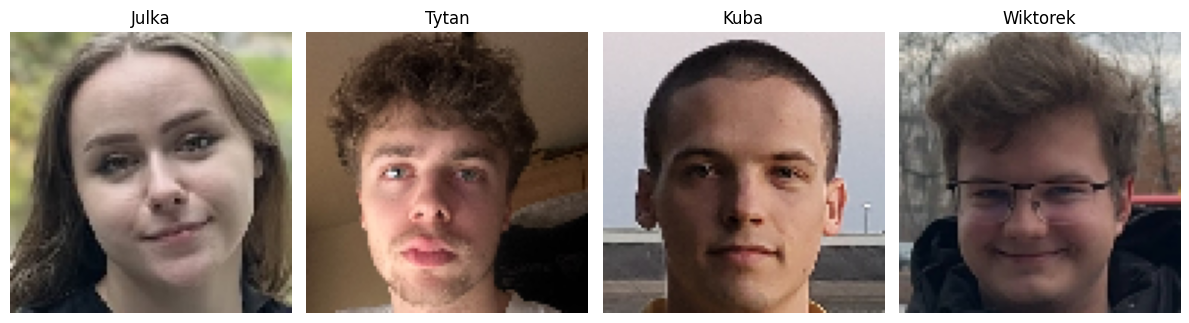

In [8]:
images = [julka, tytan, kuba, wiktor]
titles = ['Julka', 'Tytan', 'Kuba', "Wiktorek"]

plt.figure(figsize=(12, 4))

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

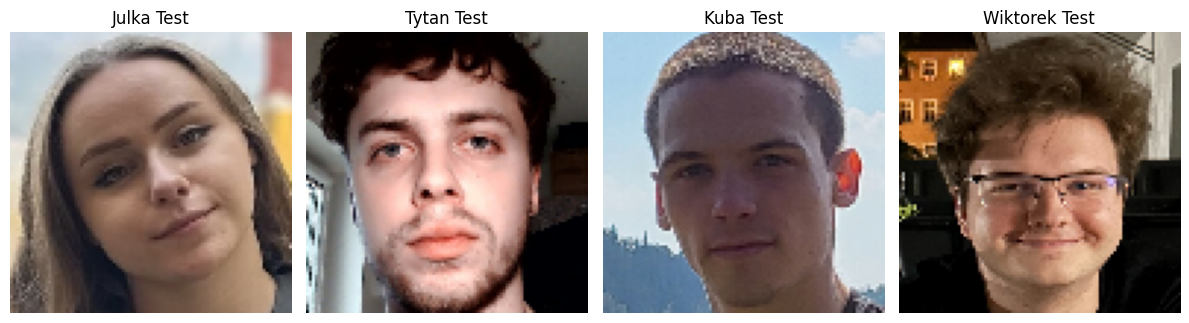

In [9]:
images = [julka_test, tytan_test, kuba_test, wiktor_test]
titles = ['Julka Test', 'Tytan Test', 'Kuba Test', 'Wiktorek Test']

plt.figure(figsize=(12, 4))

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
dist, valid = verify("../assets/wiktor_test.jpeg", "wiktor", database, model)
print('the distance is ' + str(dist))

It's wiktor, welcome in!
the distance is 0.56953377


In [11]:
min_dist, identity = who_is_it("../assets/julka_test.jpeg", database, model)
print()
min_dist, identity = who_is_it("../assets/tytan_test.jpg", database, model)
print()
min_dist, identity = who_is_it("../assets/kuba_test.png", database, model)
print()
min_dist, identity = who_is_it("../assets/wiktor_test.jpeg", database, model)

it's julka, the distance is 0.6541310548782349

it's tytan, the distance is 0.5621557235717773

it's kuba, the distance is 0.9043387770652771

it's wiktor, the distance is 0.5695337653160095
